# Data Cleaning & Manipulation

Utilising the Pandas and Scipy library to clean and process data as well as matplotlib for plotting data. 

This work stems from my coursework assignment for the Advanced Python Pandas course on the Data Science for Python programme delivered by the University of Michigan (hosted on Coursera).

One of the objectives of this project is to gain experience in dealing with open-source datasets and the type of cleaning processes associated. This includes regular expresion (regex) processing, as well as ordinary data cleaning tasks. Another objective is to practise complex data manipulation in DataFrame formats using pandas.

The first step in this project will be to import the relevant libraries which we will use.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as plt

from scipy import stats

Next we will be loading the dataset of GDP for all countries from 1960 to 2015 (found at https://data.worldbank.org/indicator/NY.GDP.MKTP.CD), a dataset of journal contributions for every country (found at https://www.scimagojr.com/countryrank.php?category=2102), as well as a dataset of the energy supply and renewable electricity production published by the United Nations for the year 2013 (found at https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Funstats.un.org%2Funsd%2Fenvironment%2Fexcel_file_tables%2F2013%2FEnergy%2520Indicators.xls&wdOrigin=BROWSELINK).

In [3]:
GDP_df = pd.read_csv('Data_Cleaning_and_Manipulation_datasets/world_bank.csv')
journals_df = pd.read_excel('Data_Cleaning_and_Manipulation_datasets/scimagojr-3.xlsx')
energy_df = pd.read_excel('Data_Cleaning_and_Manipulation_datasets/Energy Indicators.xls')

GDP_df.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2016-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2006.0,2007.0,2008.0,2009.0,2.010000e+03,2011.0,2012.0,2013.0,2014.0,2015.0
4,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [3]:
energy_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,Environmental Indicators: Energy,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Energy Supply and Renewable Electricity Produc...,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Last update: December 2015


# Cleaning the data

As you can see from the heads of both of these DataFrames, a header is present in both. The first step in cleaning these datasets will be to remove header and footer information. 

For the energy dataset, the first two columns are unecessary, and there are several countries with numbers and/or parenthesis in their name. There is also an unnecessary header and footer section in this dataset. In order to match up the country names in both dataframes, these records will have to be edited to remove the numbers and text after the parenthesis. The units for the Energy Supply column are in petajoules, while the units in the Energy Supply per Capita column are in Gigajoules - ensure both columns are in Gigajoules. 

For the GDP dataset, there is an unnecessary header section in this dataset. The column called Data Source should be renamed to Country so it may match with the energy dataset, and only the final 3 years should be included in the dataframe.

We should also set the index to both dataframes to be the Country column. 

In [4]:
def energy_df_cleaner(df):
    #regex to remove everything after a pattern of a whitespace following by parenthesis or any digits
    df = (df.iloc[17:244, 2:]
             .set_axis(['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'], axis=1)
             .replace(to_replace=["(\s\(.*)|(\d*$)"], value="", regex=True)       
         )
    df.set_index('Country', inplace = True)
         
    df["Energy Supply"] = df["Energy Supply"]*1000000
    return df

def GDP_df_cleaner(df):
    df = (df.iloc[4:, [0,1,-3,-2,-1]]
             .rename(columns = {
                        'Data Source': 'Country',
                        df.columns[-3]: '2013',
                        df.columns[-2]: '2014',
                        df.columns[-1]: '2015',
                               })
         )
    df.set_index('Country', inplace = True)
    return df

clean_energy_df = energy_df_cleaner(energy_df)
clean_GDP_df = GDP_df_cleaner(GDP_df)

clean_GDP_df

,World Development Indicators,2013,2014,2015
Country,,,,
Aruba,ABW,NaN,NaN,NaN
Andorra,AND,3.127550e+09,NaN,NaN
Afghanistan,AFG,1.973134e+10,1.999032e+10,2.029415e+10
Angola,AGO,9.626143e+10,1.008863e+11,1.039106e+11
Albania,ALB,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...
"Yemen, Rep.",YEM,2.800914e+10,NaN,NaN
South Africa,ZAF,4.047682e+11,4.110369e+11,4.163117e+11
"Congo, Dem. Rep.",COD,2.550050e+10,2.778776e+10,2.970961e+10


In [5]:
#They have different lengths, need to find which countries are missing from which dataframe

print('The Energy dataframe includes {} countries, whilst the GDP dataframe includes {} countries'.format(len(clean_energy_df), len(clean_GDP_df)))

The Energy dataframe includes 227 countries, whilst the GDP dataframe includes 264 countries


In [6]:
#In line below, you can see the top 5 entries for the dataframe which contains every country in clean_GDP_df 
#which is not in clean_energy_df

clean_GDP_df[~clean_GDP_df.index.isin(clean_energy_df.index)].head()

,World Development Indicators,2013,2014,2015
Country,,,,
Arab World,ARB,2.385580e+12,2.436659e+12,2.509068e+12
"Bahamas, The",BHS,8.136305e+09,8.219522e+09,8.319840e+09
Central Europe and the Baltics,CEB,1.377044e+12,1.415218e+12,1.463305e+12
Channel Islands,CHI,NaN,NaN,NaN
Cote d'Ivoire,CIV,2.876832e+10,3.122699e+10,3.386308e+10


In [7]:
#In line below, you can see the top 5 entries for the dataframe which contains every country in clean_energy_df 
#which is not in clean_GDP_df

clean_energy_df[~clean_energy_df.index.isin(clean_GDP_df.index)].head()

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Anguilla,2000000,136,0.0
Bahamas,45000000,118,0.0
"Bonaire, Sint Eustatius and Saba",5000000,213,0.0
"China, Hong Kong Special Administrative Region",585000000,82,0.0
"China, Macao Special Administrative Region",47000000,83,0.0


An inspection of the two dataframes shows that in a few instances the reason why some countries are missing in each dataframe is because they are named in different ways within each dataframe. 

For example, South Korea is referred to as "Republic of Korea" in the clean_energy_df, and as "Korea, Rep." in the clean_GDP_df. A visual inspection of the two dataframes which are composed of the missing countries between the two dataframes can yield the result of these countries which are specified under different names in the dataframes. Some of these instances can be fixed by renaming some countries in each data frame. 

For the clean_energy_df, the following countries should be renamed: 
"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

For the clean_GDP_df, the following countries should be renamed:
"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"

In [8]:
clean_energy_df.rename(index = {
    'Republic of Korea': 'South Korea',
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'China, Hong Kong Special Administrative Region': 'Hong Kong'},
    inplace = True)

clean_GDP_df.rename(index = {
    'Korea, Rep.': 'South Korea', 
    'Iran, Islamic Rep.': 'Iran',
    'Hong Kong SAR, China': 'Hong Kong'},
    inplace = True)

# Here we will just check that the index has been updated correctl for both dataframes. 
print(clean_energy_df.loc['South Korea'])
print(clean_GDP_df.loc['South Korea'])

Energy Supply               11007000000
Energy Supply per Capita            221
% Renewable                    2.279353
Name: South Korea, dtype: object
World Development Indicators                     KOR
2013                            1194429021591.570068
2014                             1234340240503.48999
2015                            1266580410309.110107
Name: South Korea, dtype: object


# Data manipulation

The next step will be to merge the two dataframes using an intersect merge, or an inner merge in database terminology. 

In [9]:
GDP_energy_df = pd.merge(clean_energy_df, clean_GDP_df, left_index = True, right_index = True)

GDP_energy_df.head()

,Energy Supply,Energy Supply per Capita,% Renewable,World Development Indicators,2013,2014,2015
Country,,,,,,,
Afghanistan,321000000,10,78.669280,AFG,1.973134e+10,1.999032e+10,2.029415e+10
Albania,102000000,35,100.000000,ALB,1.254247e+10,1.279331e+10,1.312082e+10
Algeria,1959000000,51,0.551010,DZA,1.763249e+11,1.830252e+11,1.901632e+11
American Samoa,.................................................,...,0.641026,ASM,NaN,NaN,NaN
Andorra,9000000,121,88.695650,AND,3.127550e+09,NaN,NaN


We can now merge the dataframe above with the dataset relating to journal contributions for every country

In [10]:
#Here we reset the index since the journals_df won't be indexed by country. We can set country again as the index later.
GDP_energy_df.reset_index(inplace = True)

merged_df = pd.merge(GDP_energy_df, journals_df, how = 'outer')
merged_df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable,World Development Indicators,2013,2014,2015,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,Afghanistan,321000000,10,78.669280,AFG,1.973134e+10,1.999032e+10,2.029415e+10,163.0,3.0,3.0,0.0,0.0,0.00,0.0
1,Albania,102000000,35,100.000000,ALB,1.254247e+10,1.279331e+10,1.312082e+10,118.0,23.0,23.0,168.0,14.0,7.30,6.0
2,Algeria,1959000000,51,0.551010,DZA,1.763249e+11,1.830252e+11,1.901632e+11,42.0,1215.0,1197.0,7393.0,1413.0,6.08,40.0
3,American Samoa,.................................................,...,0.641026,ASM,NaN,NaN,NaN,180.0,1.0,1.0,0.0,0.0,0.00,0.0
4,Andorra,9000000,121,88.695650,AND,3.127550e+09,NaN,NaN,168.0,2.0,2.0,13.0,0.0,6.50,1.0


The next step will be to sort the dataframe by the top 15 countries based on their Scimagojr 'Rank'

In [11]:
scimago_sorted_df = merged_df.sort_values(by = ["Rank"], ascending = True)
scimago_sorted_df.set_index("Country", inplace = True)

top_df = scimago_sorted_df.iloc[:15]
top_df.head()

,Energy Supply,Energy Supply per Capita,% Renewable,World Development Indicators,2013,2014,2015,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,
China,127191000000,93,19.75491,CHN,7.672448e+12,8.230121e+12,8.797999e+12,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0
United States,90838000000,286,11.57098,USA,1.577367e+13,1.615662e+13,1.654857e+13,2.0,96661.0,94747.0,792274.0,265436.0,8.20,230.0
Japan,18984000000,149,10.23282,JPN,5.644659e+12,5.642884e+12,5.669563e+12,3.0,30504.0,30287.0,223024.0,61554.0,7.31,134.0
United Kingdom,7920000000,124,10.60047,GBR,2.533370e+12,2.605643e+12,2.666333e+12,4.0,20944.0,20357.0,206091.0,37874.0,9.84,139.0
Russian Federation,30709000000,214,17.28868,RUS,1.666934e+12,1.678709e+12,1.616149e+12,5.0,18534.0,18301.0,34266.0,12422.0,1.85,57.0


Another exercise on data manipulation entails finding the top 15 countries for average GDP between 2013 to 2015, and also give the change in GDP over the 3 years for the country with the 6th largest average GDP over this time. 

In [12]:
merged_df['Three Year Average'] = merged_df[['2013', '2014', '2015']].mean(axis=1)
GDP_sorted_df = merged_df.sort_values(by = 'Three Year Average', ascending = False)
top_GDP_df = GDP_sorted_df.iloc[:15]

top_GDP_df.iloc[5]['2015'] - top_GDP_df.iloc[5]['2013']

132963286464.77002

The final exercise will be to create a column in the dataframe for the 15 countries with the top GDP which estimates the number of citable documents per person. Then find the correlation between the number of citable documents per capita and the energy supply per capita.

To do this, we first have to create a new column which will estimate the total population of a countries based on the energy supply and energy supply per capita data from the energy dataframe. Then, we will generate the citable documents per capita data using this estimate. Finally, we can find the correlation between the citable documents per capita and the energy supply per capita, and we can plot this this relationship to corroborate the correlation calculated. 

           Country Energy Supply Energy Supply per Capita % Renewable  \
180  United States   90838000000                      286    11.57098   
39           China  127191000000                       93    19.75491   
88           Japan   18984000000                      149    10.23282   
64         Germany   13261000000                      165    17.90153   
60          France   10597000000                      166    17.02028   

    World Development Indicators                  2013                  2014  \
180                          USA      15773666098800.0      16156618476000.0   
39                           CHN  7672447738017.419922  8230120617793.519531   
88                           JPN  5644658523313.419922   5642884448582.19043   
64                           DEU   3567317390728.47998  3624386278145.700195   
60                           FRA  2722566887417.220215  2729631788079.470215   

                     2015 Rank Documents Citable documents Citations  \
180     

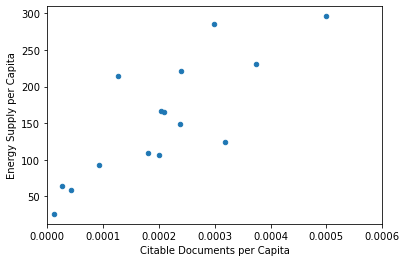

In [44]:
def Population_Estimator(Row):
    Row['Population Estimate'] = Row['Energy Supply']/Row['Energy Supply per Capita']
    return Row

def Citable_Docs_Per_Cap(Row):
    Row['Citable Documents per Capita'] = Row['Citable documents']/Row['Population Estimate']
    return Row

def plotter(df):
    %matplotlib inline
    
    df.plot(x = 'Citable Documents per Capita', y = 'Energy Supply per Capita', kind = 'scatter', xlim = [0, 0.0006])

top_GDP_df = (top_GDP_df.T
              .apply(Population_Estimator)
              .apply(Citable_Docs_Per_Cap)
              .T)

print(top_GDP_df.head())


#In the two lines below, we are ensuring that the columns that go into the correlation calculations are numeric. If the lines 
#were excluded, then an error would appear stating that the 'float' obejct has no attribute 'shape'.
top_GDP_df['Citable Documents per Capita'] = pd.to_numeric(top_GDP_df['Citable Documents per Capita'])
top_GDP_df['Energy Supply per Capita'] = pd.to_numeric(top_GDP_df['Energy Supply per Capita'])

correlation = top_GDP_df['Citable Documents per Capita'].corr(top_GDP_df['Energy Supply per Capita'])

plotter(top_GDP_df)

print()
print("The correlation value between the citable documents per capita and the energy supply per capita is: ", correlation)